# A newer version of this Notebook exists [here](https://github.com/podaac/tutorials/blob/master/notebooks/HUC%20Feature%20Translation%20Service%20Examples-updated-20210804.ipynb).
## HUC Feature Translation Service (FTS) Examples

This Jupyter Notebook contains examples related to querying the *HUC Feature Translation Service (FTS)*, previewing (viusualizing) the queried region of interest, and using FTS results to query NASA's Common Metadata Repository (CMR).

**Example Use Case:** 
Check if data is available over my region of interest using HUCs. In this example we are using FTS to geospatially define our region of interest, namely the Upper Tuolumne River Basin in the San Joaquin River Basin in California's Sierra Nevada, searching by HUC or region name, and then using those geospatial bounds (coordinates) to query Sentinel-1 data in CMR.
1. use FTS to define geographic region of interest (query by partial or exact HUC or HUC region name)
2. preview query 
3. use coordinates returned by FTS to query Sentinel-1 data in CMR, by polygon or bounding box.

**Resources**

USGS Hydrologic unit map to help identifiy region of interest (e.g. HUC value or name) can be found here: https://water.usgs.gov/GIS/regions.html 

In [1]:
%%capture

import sys
!{sys.executable} -m pip install bs4 requests

from bs4 import BeautifulSoup
import requests
import json

cloudfront_url = "https://d3fu1wb0xptl0v.cloudfront.net"

## Search Feature Translation Service for Partial Region Matches

If you are unsure what the corresponding HUC is for your region of interest, you can query the FTS for _partial_ region matches.

In [2]:
###################

# Querying partial matches with region "San Joaquin"
# This "partial" match is anything that BEGINS with the region specified.

REGION = "San Jo"
EXACT = False

###################

# Query Feature Translation Service and parse JSON response
r = requests.get(cloudfront_url + "/region/{}?exact={}".format(REGION, EXACT))

# Load response from FTS
response = r.json()

# Print all elements in HUC database that partially matches with HUC 1805000301
print(json.dumps(response, indent = 4))

{
    "status": "200 OK",
    "hits": 11,
    "time": "5.689 ms.",
    "search on": {
        "parameter": "region",
        "exact": false
    },
    "results": {
        "San Joaquin": {
            "HUC": "1804",
            "Bounding Box": "-121.93679916804501,36.36688239563472,-118.65438684397327,38.757297326299295",
            "Convex Hull Polygon": "-120.63835246068544,36.36688239563472,-120.63808719818587,36.3669077091763,-118.73841884071788,37.07942819140368,-118.67420150956752,37.106490572611676,-118.6735564366519,37.10721677469388,-118.66992847311582,37.11265112260213,-118.65448236168146,37.14116804130782,-118.65438684397327,37.14146941734907,-118.65439289188998,37.14204016109818,-118.66449457312427,37.26170858174572,-118.76220691672262,37.45668952727641,-119.3277000731365,38.0651666159153,-119.68023816217266,38.44035645491624,-119.68779037986923,38.44773399761311,-119.84793537962065,38.5975748484222,-119.85336387752892,38.602501526539584,-119.85360401398685,38.602636703622

## Search Feature Translation Service for Exact HUC Matches

Here we can define a HUC, or hydrologic unit code, and use this to query the HUC FTS. By defining the parameter _EXACT = True_, we tell the query to not search for partial matches.

Based on the partial response in the previous step, we can now do an exact search for SJRB, using its HUC (1804).

In [3]:
###################

# Querying exact matches for HUC "1804" = San Joaquin RB

HUC = "1804"
EXACT = True

###################

# Query Feature Translation Service and parse JSON response
r = requests.get(cloudfront_url + "/huc/{}?exact={}".format(HUC, EXACT))

# Load response from FTS
response = r.json()

# Print all elements in HUC database that exactly match HUC "1804"
print(json.dumps(response, indent = 4))

{
    "status": "200 OK",
    "hits": 1,
    "time": "1.452 ms.",
    "search on": {
        "parameter": "HUC",
        "exact": true
    },
    "results": {
        "1804": {
            "Region Name": "San Joaquin",
            "Bounding Box": "-121.93679916804501,36.36688239563472,-118.65438684397327,38.757297326299295",
            "Convex Hull Polygon": "-120.63835246068544,36.36688239563472,-120.63808719818587,36.3669077091763,-118.73841884071788,37.07942819140368,-118.67420150956752,37.106490572611676,-118.6735564366519,37.10721677469388,-118.66992847311582,37.11265112260213,-118.65448236168146,37.14116804130782,-118.65438684397327,37.14146941734907,-118.65439289188998,37.14204016109818,-118.66449457312427,37.26170858174572,-118.76220691672262,37.45668952727641,-119.3277000731365,38.0651666159153,-119.68023816217266,38.44035645491624,-119.68779037986923,38.44773399761311,-119.84793537962065,38.5975748484222,-119.85336387752892,38.602501526539584,-119.85360401398685,38.602636703

## Search Feature Translation Service for Partial Region Matches

But we are specifically interested in Tuolumne RB within the San Joaquin, so let's do a partial search for "Upper Tuo", given we may not know the exact region name.

In [4]:
###################

# Querying partial matches with region "Upper Tuo"
# This "partial" match is anything that BEGINS with the region specified.

REGION = "Upper Tuo"
EXACT = False

###################

# Query Feature Translation Service and parse JSON response
r = requests.get(cloudfront_url + "/region/{}?exact={}".format(REGION, EXACT))

# Load response from FTS
response = r.json()

# Print all elements in HUC database that partially matches with HUC 1805000301
print(json.dumps(response, indent = 4))

{
    "status": "200 OK",
    "hits": 1,
    "time": "1.549 ms.",
    "search on": {
        "parameter": "region",
        "exact": false
    },
    "results": {
        "Upper Tuolumne": {
            "HUC": "18040009",
            "Bounding Box": "-121.17476593797784,37.57291785522102,-119.19927543166921,38.22952896670182",
            "Convex Hull Polygon": "-121.105517801627,37.57291785522102,-120.51777999837259,37.58160878749919,-119.26845687218679,37.73942430183757,-119.26095827844847,37.741190162251485,-119.26079495969867,37.74128122475133,-119.25581474616479,37.7450598684955,-119.25563206491506,37.74520087891193,-119.25521361804067,37.745555179953044,-119.20452512020273,37.79316755800414,-119.20311483687158,37.794898117376476,-119.20297581291345,37.79511513091779,-119.20108320354137,37.801137019450096,-119.20096521291657,37.803876760070864,-119.19927543166921,37.88483115890352,-119.19931234937746,37.885001276611604,-119.20064394937538,37.88738135160793,-119.31090541587093,38.0

## Search Feature Translation Service for Exact Named Region Matches

Given the above response, or that we already know an exact region name or HUC in USGS's Watershed Boundary Dataset (WBD), we can use this instead of a partial search. Below is an example of exact matches by HUC (18040009), and then by region name ("Upper Tuolumne").

In [5]:
###################

# Querying exact matches with HUC "18040009" = Upper Tuolumne

HUC = "18040009"
EXACT = True

###################

# Query Feature Translation Service and parse JSON response
r = requests.get(cloudfront_url + "/huc/{}?exact={}".format(HUC, EXACT))

# Load response from FTS
response = r.json()

# Print all elements in HUC database that exactly match HUC "1804"
print(json.dumps(response, indent = 4))

{
    "status": "200 OK",
    "hits": 1,
    "time": "1.516 ms.",
    "search on": {
        "parameter": "HUC",
        "exact": true
    },
    "results": {
        "18040009": {
            "Region Name": "Upper Tuolumne",
            "Bounding Box": "-121.17476593797784,37.57291785522102,-119.19927543166921,38.22952896670182",
            "Convex Hull Polygon": "-121.105517801627,37.57291785522102,-120.51777999837259,37.58160878749919,-119.26845687218679,37.73942430183757,-119.26095827844847,37.741190162251485,-119.26079495969867,37.74128122475133,-119.25581474616479,37.7450598684955,-119.25563206491506,37.74520087891193,-119.25521361804067,37.745555179953044,-119.20452512020273,37.79316755800414,-119.20311483687158,37.794898117376476,-119.20297581291345,37.79511513091779,-119.20108320354137,37.801137019450096,-119.20096521291657,37.803876760070864,-119.19927543166921,37.88483115890352,-119.19931234937746,37.885001276611604,-119.20064394937538,37.88738135160793,-119.31090541587093,

In [6]:
###################

# Querying exact matches with region "Upper Tuolumne"

REGION = "Upper Tuolumne"
EXACT = True

###################

# Query Feature Translation Service and parse JSON response
# Note the change in endpoint from "/prod/huc" to "/prod/region"
r = requests.get(cloudfront_url + "/region/{}?exact={}".format(REGION, EXACT))

# Load response from FTS
response = r.json()

# Print all elements in HUC database that exact matches with region "Woods Creek-Skykomish River"
print(json.dumps(response, indent = 4))

{
    "status": "200 OK",
    "hits": 1,
    "time": "1.665 ms.",
    "search on": {
        "parameter": "region",
        "exact": true
    },
    "results": {
        "Upper Tuolumne": {
            "HUC": "18040009",
            "Bounding Box": "-121.17476593797784,37.57291785522102,-119.19927543166921,38.22952896670182",
            "Convex Hull Polygon": "-121.105517801627,37.57291785522102,-120.51777999837259,37.58160878749919,-119.26845687218679,37.73942430183757,-119.26095827844847,37.741190162251485,-119.26079495969867,37.74128122475133,-119.25581474616479,37.7450598684955,-119.25563206491506,37.74520087891193,-119.25521361804067,37.745555179953044,-119.20452512020273,37.79316755800414,-119.20311483687158,37.794898117376476,-119.20297581291345,37.79511513091779,-119.20108320354137,37.801137019450096,-119.20096521291657,37.803876760070864,-119.19927543166921,37.88483115890352,-119.19931234937746,37.885001276611604,-119.20064394937538,37.88738135160793,-119.31090541587093,38.04

# Visualize the Response from the HUC Feature Translation Service

Below are two examples of how to visualize the response from the Feature Translation Service. As of now, without support from the Earthdata search client, there's no easy way to glean whether your response _is_ indeed correct. So, here I provide code that takes a response from the HUC Feature Translation Service, and graphs the associated bounding boxes, convex hull polygons, and Visvalingam-Whyatt polygons.

In [7]:
%%capture

import sys
!{sys.executable} -m pip install geopandas pandas requests shapely numpy
from shapely.geometry import box, Polygon
import matplotlib.pyplot as plt 
import geopandas as gpd
import numpy as np
import requests
import json
import math

#cmo 2019-11-07
from bs4 import BeautifulSoup
import requests
import json

## Function for Visualization

Below is a function created specifically to visualize the output of the HUC Feature Translation Service. 

In [8]:
def visualize(fts_response):
    
    regions = []
    bounding_boxes = []
    convex_hull_polygons = []
    visvalingam_polygons = []
    for element in fts_response['results']:
        for heading in fts_response['results'][element]:
            if heading == "Bounding Box":
                bounding_boxes.append([float(e) for e in fts_response['results'][element][heading].split(",")])
            elif heading == "Convex Hull Polygon":
                convex_hull_polygons.append([float(e) for e in fts_response['results'][element][heading].split(",")])
            elif heading == "Visvalingam Polygon":
                visvalingam_polygons.append([float(e) for e in fts_response['results'][element][heading].split(",")])
            elif heading == "HUC":
                regions.append("Region Name: " + element + "\n" + "HUC: " + fts_response['results'][element][heading])
            elif heading == "Region Name":
                regions.append("Region Name: " + fts_response['results'][element][heading] + "\n" + "HUC: " + element)
            else:
                continue

    bounding_boxes = [box(e[0], e[1], e[2], e[3]) for e in bounding_boxes]
    convex_hull_polygons = [Polygon(np.asarray(polygon).reshape(-1,2)) for polygon in convex_hull_polygons]
    visvalingam_polygons = [Polygon(np.asarray(polygon).reshape(-1,2)) for polygon in visvalingam_polygons]
    
    for i in range(len(bounding_boxes)):
        ax = gpd.GeoSeries(bounding_boxes[i]).plot(alpha=0.2, cmap='Pastel1', figsize=(10,10))
        gpd.GeoSeries(convex_hull_polygons[i]).plot(ax = ax, cmap='Pastel2')
        gpd.GeoSeries(visvalingam_polygons[i]).plot(alpha=0.5, ax=ax, cmap='viridis')

        plt.title(regions[i])
        plt.show()
            

## Visualization

We can take that response and pass it to the _visualize()_ function created above. 

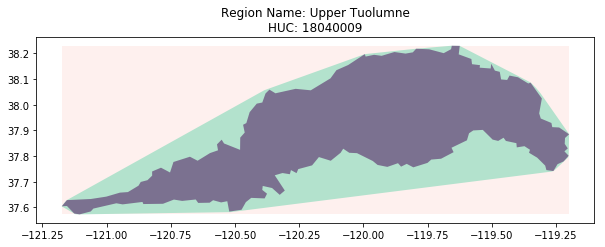

In [9]:
#visualize FTS response
visualize(response)

In [10]:
###################
# Querying exact matches with HUC "18040009" = Upper Tuolumne

HUC = "18040009"
EXACT = True

###################

# Query Feature Translation Service and parse JSON response
r = requests.get(cloudfront_url + "/huc/{}?exact={}".format(HUC, EXACT))

# Load response from FTS
response = r.json()

# Print all elements in HUC database that exactly match HUC "1804"
print(json.dumps(response, indent = 4))

{
    "status": "200 OK",
    "hits": 1,
    "time": "1.556 ms.",
    "search on": {
        "parameter": "HUC",
        "exact": true
    },
    "results": {
        "18040009": {
            "Region Name": "Upper Tuolumne",
            "Bounding Box": "-121.17476593797784,37.57291785522102,-119.19927543166921,38.22952896670182",
            "Convex Hull Polygon": "-121.105517801627,37.57291785522102,-120.51777999837259,37.58160878749919,-119.26845687218679,37.73942430183757,-119.26095827844847,37.741190162251485,-119.26079495969867,37.74128122475133,-119.25581474616479,37.7450598684955,-119.25563206491506,37.74520087891193,-119.25521361804067,37.745555179953044,-119.20452512020273,37.79316755800414,-119.20311483687158,37.794898117376476,-119.20297581291345,37.79511513091779,-119.20108320354137,37.801137019450096,-119.20096521291657,37.803876760070864,-119.19927543166921,37.88483115890352,-119.19931234937746,37.885001276611604,-119.20064394937538,37.88738135160793,-119.31090541587093,

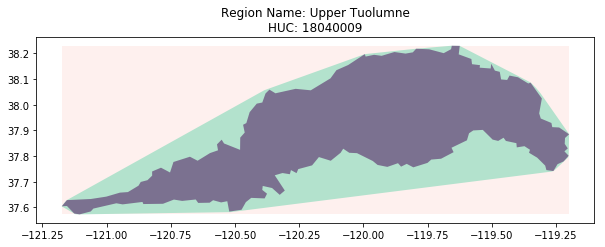

In [11]:
#visualize FTS response
visualize(response)

---
---

## Query CMR by Polygon

Here is a more useful example of the Feature Translation Service. We can use results obtained from the FTS to then directly and automatically query CMR. Below I'm extracting the polygon representing Upper Tuolumne River Basin within the San Joaquin River Basin, and using it to search for granules available through the Sentinel-1 mission. 

In [ ]:

###################

COLLECTION_ID = "C1522341104-NSIDC_ECS" # SMAP/Sentinel-1 L2 Radiometer/Radar 30-Second Scene 3 km EASE-Grid Soil Moisture V002
REGION = "Upper Tuolumne"
EXACT = True

###################

# Query Feature Translation Service and parse JSON response
r = requests.get(cloudfront_url + "/region/{}?exact={}".format(REGION, EXACT))

# Load response from FTS
response = r.json()

# Obtain convex hull polygon from response
polygon = response['results'][REGION]['Convex Hull Polygon']
#polygon = response['results'][REGION]['Visvalingam Polygon']

# Query CMR
# --------- #

cmr_response = requests.get("https://cmr.earthdata.nasa.gov/search/granules.json?polygon={}&echo_collection_id={}&pretty=True".format(polygon, COLLECTION_ID))

# --------- #

# Make it look nice
print(json.dumps(cmr_response.json(), indent = 4))

{
    "feed": {
        "updated": "2019-11-26T18:24:02.850Z",
        "id": "https://cmr.earthdata.nasa.gov:443/search/granules.json?polygon=-121.105517801627,37.57291785522102,-120.51777999837259,37.58160878749919,-119.26845687218679,37.73942430183757,-119.26095827844847,37.741190162251485,-119.26079495969867,37.74128122475133,-119.25581474616479,37.7450598684955,-119.25563206491506,37.74520087891193,-119.25521361804067,37.745555179953044,-119.20452512020273,37.79316755800414,-119.20311483687158,37.794898117376476,-119.20297581291345,37.79511513091779,-119.20108320354137,37.801137019450096,-119.20096521291657,37.803876760070864,-119.19927543166921,37.88483115890352,-119.19931234937746,37.885001276611604,-119.20064394937538,37.88738135160793,-119.31090541587093,38.044980644071586,-119.3277000731365,38.0651666159153,-119.32796109605277,38.06544024091488,-119.34908448143665,38.08655395234041,-119.62508146642494,38.22905559795254,-119.65624842470987,38.22952896670182,-119.65829346949835,

## Query CMR by Bounding Box

Instead of querying via polygon, we can extract the bounding box of the region and use this to query CMR. Similarly to above, we're extracting information (this time the bounding box) from the Upper Tuolumne River Basin and using this to search for granules available through the Sentinel-1 mission. 

Here we query by _region_ in these two examples, however it would be equally valid to query by _HUC_. 

In [13]:
###################

COLLECTION_ID = "C1522341104-NSIDC_ECS" # SMAP/Sentinel-1 L2 Radiometer/Radar 30-Second Scene 3 km EASE-Grid Soil Moisture V002
REGION = "Upper Tuolumne"

###################

# Query Feature Translation Service and parse JSON response
r = requests.get(cloudfront_url + "/region/{}?exact={}".format(REGION, EXACT))

# Load response from FTS
response = r.json()

# Obtain bounding box from response
bbox = response['results'][REGION]['Bounding Box']

# Query CMR
# --------- #

cmr_response = requests.get("https://cmr.earthdata.nasa.gov/search/granules.json?bounding_box={}&echo_collection_id={}&pretty=True".format(bbox, COLLECTION_ID))

# --------- #

# Make it look nice
print(json.dumps(cmr_response.json(), indent = 4))

{
    "feed": {
        "updated": "2019-11-26T18:24:03.927Z",
        "id": "https://cmr.earthdata.nasa.gov:443/search/granules.json?bounding_box=-121.17476593797784,37.57291785522102,-119.19927543166921,38.22952896670182&echo_collection_id=C1522341104-NSIDC_ECS&pretty=True",
        "title": "ECHO granule metadata",
        "entry": [
            {
                "producer_granule_id": "SMAP_L2_SM_SP_1AIWDV_20150401T011959_20150401T015854_120W37N_R16010_001.h5",
                "time_start": "2015-04-01T01:19:59.000Z",
                "updated": "2019-07-12T16:31:30.636Z",
                "dataset_id": "SMAP/Sentinel-1 L2 Radiometer/Radar 30-Second Scene 3 km EASE-Grid Soil Moisture V002",
                "data_center": "NSIDC_ECS",
                "title": "SC:SPL2SMAP_S.002:141648389",
                "coordinate_system": "GEODETIC",
                "time_end": "2015-04-01T01:20:31.000Z",
                "id": "G1565814828-NSIDC_ECS",
                "original_format": "ISO-SMAP",